In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 0s 0us/step


**Let's try to fit the dataset with a simplest model with just one dense layer.** 

In [0]:
model_simple = models.Sequential()
# Input shape is (28,28), last dimension represents number of channels.
model_simple.add(layers.Flatten(input_shape=(28, 28, 1)))
model_simple.add(layers.Dense(10, activation='softmax'))
model_simple.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model_simple.fit(train_images, train_labels, epochs=20)


Epoch 1/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4718 - acc: 0.8760
Epoch 2/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3045 - acc: 0.9148
Epoch 3/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2837 - acc: 0.9200
Epoch 4/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2727 - acc: 0.9239
Epoch 5/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2665 - acc: 0.9261
Epoch 6/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2623 - acc: 0.9271
Epoch 7/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2588 - acc: 0.9285
Epoch 8/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2557 - acc: 0.9294
Epoch 9/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2531 - acc: 0.9297
Epoch 10/20
60000/60000 [==============================] - 4s 61us/sample - loss: 

**Even with the simplest model a train accuracy of 93% can be achieved. Let's check the test accuracy.**  

In [0]:
_, test_acc = model_simple.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.2680 - acc: 0.9284


**Let's plot how the weights look like.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def plotWeights(model,layout=(2,5),Layer=0,outputShape=(28,28,10),title=True,filternum=-1):
  '''
  Plots the weights of given model and layout
  '''

  _,axes=plt.subplots(nrows=layout[0],ncols=layout[1])
    
    #Unrolling axes helps plotting in a single for loop.
    axes_unrolled=axes.reshape(1,layout[0]*layout[1])[0]

    for i in range(len(axes_unrolled)):
        ## conditions change there is only one filter or multiple filters in a convolutional layer
        if filternum<0:
            axes_unrolled[i].imshow((model.get_weights()[Layer]+model.get_weights()[Layer+1]).reshape(outputShape)[:,:,i],cmap=plt.cm.binary)
        else:
            axes_unrolled[i].imshow((model.get_weights()[Layer]+model.get_weights()[Layer+1]).reshape(outputShape)[:,:,filternum,i],cmap=plt.cm.binary)
        axes_unrolled[i].set_yticklabels([])
        axes_unrolled[i].set_xticklabels([])
        
        if title:
        axes_unrolled[i].set_title('Digit='+str(i))
    plt.tight_layout()

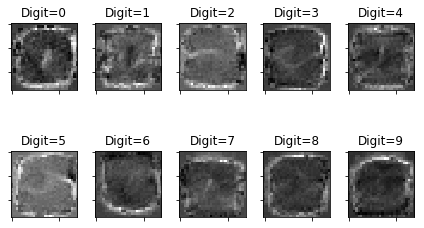

In [0]:
plotWeights(model_simple)

**There is a light image of digits which can be seen in the plots which parts are given more weights in the case of specific digits.**

**Let's try with one convolution layer to see how it changes the train and test accuracy.**

In [0]:
model_oneConv = models.Sequential()
model_oneConv.add(layers.Conv2D(2, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model_oneConv.add(layers.Flatten())
model_oneConv.add(layers.Dense(10, activation='softmax'))
model_oneConv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model_oneConv.fit(train_images, train_labels, epochs=20, validation_data=(test_images,test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3621 - acc: 0.9031 - val_loss: 0.2169 - val_acc: 0.9384
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1948 - acc: 0.9450 - val_loss: 0.1719 - val_acc: 0.9509
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1597 - acc: 0.9540 - val_loss: 0.1502 - val_acc: 0.9562
Epoch 4/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1414 - acc: 0.9594 - val_loss: 0.1372 - val_acc: 0.9581
Epoch 5/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1298 - acc: 0.9623 - val_loss: 0.1309 - val_acc: 0.9616
Epoch 6/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1221 - acc: 0.9643 - val_loss: 0.1379 - val_acc: 0.9592
Epoch 7/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1163 - acc: 0.9657 - val_loss: 0.

**There is an increase in the both the train and test accuracy by using one convolutional layer.**

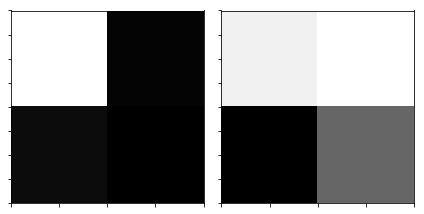

In [0]:
plotWeights(model_oneConv,layout=(1,2),Layer=0,outputShape=(2,2,2),title=False)

**The first filter finds out the diagnal lines and second one finds out the horizontal lines in the image. Let's see how it finds out the lines on an image.**

**To find out the output of the layer we use tensorflow backend.**

In [0]:
from tensorflow.keras import backend

In [0]:
inp = model_oneConv.input                           
outputs = model_oneConv.layers[0].output          
functors = backend.function([inp], [outputs]) 

# 3rd index is chosen randomly
test = test_images[3:4]
layer_outs = functors([test])

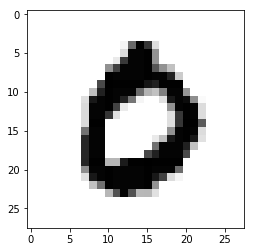

In [0]:
plt.imshow(test_images[3].reshape(28,28),cmap=plt.cm.binary)

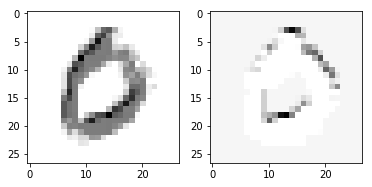

In [0]:
fig,axes=plt.subplots(nrows=1,ncols=2)

axes[0].imshow(np.asarray(layer_outs).reshape(27,27,2)[:,:,0],cmap=plt.cm.binary)
axes[1].imshow(np.asarray(layer_outs).reshape(27,27,2)[:,:,1],cmap=plt.cm.binary)

**This was also predicted by looking at the filters.**

In [0]:
model_oneConv.get_weights()[2].shape

(1458, 10)

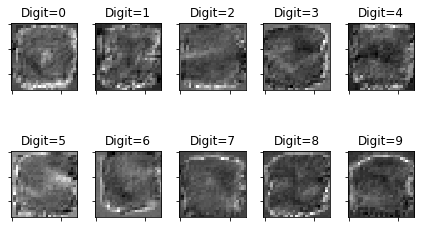

In [0]:
plotWeights(model_oneConv,layout=(2,5),Layer=2,outputShape=(27,27,2,10),title=True,filternum=0)

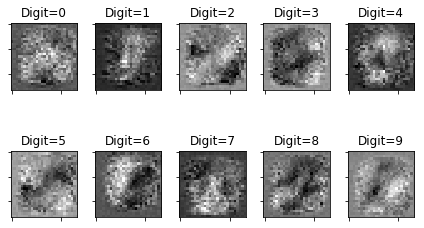

In [0]:
plotWeights(model_oneConv,layout=(2,5),Layer=2,outputShape=(27,27,2,10),title=True,filternum=1)

**Dense layer 2 is somewhat similar to single dense layer network.
Dense layer 1 seems to removing noise from image.**

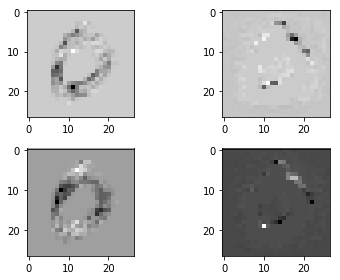

In [0]:
#Checking how the dense layer weights interact with the image
weights1=(model_oneConv.get_weights()[2][:,0]+model_oneConv.get_weights()[3][0]).reshape(27,27,2)[:,:,0]
weights2=(model_oneConv.get_weights()[2][:,0]+model_oneConv.get_weights()[3][0]).reshape(27,27,2)[:,:,1]

#Checking how the weights for the wrong digits(like 4) interact with the image
weights1wrong=(model_oneConv.get_weights()[2][:,4]+model_oneConv.get_weights()[3][0]).reshape(27,27,2)[:,:,0]
weights2wrong=(model_oneConv.get_weights()[2][:,4]+model_oneConv.get_weights()[3][0]).reshape(27,27,2)[:,:,1]

fig,axes=plt.subplots(nrows=2,ncols=2)

axes[0][0].imshow(np.asarray(layer_outs).reshape(27,27,2)[:,:,0]*weights1,cmap=plt.cm.binary)
axes[0][1].imshow(np.asarray(layer_outs).reshape(27,27,2)[:,:,1]*weights2,cmap=plt.cm.binary)
axes[1][0].imshow(np.asarray(layer_outs).reshape(27,27,2)[:,:,0]*weights1wrong,cmap=plt.cm.binary)
axes[1][1].imshow(np.asarray(layer_outs).reshape(27,27,2)[:,:,1]*weights2wrong,cmap=plt.cm.binary)
plt.tight_layout()

**There is not much interesting to see here, however, one can see the more black pixels in upper row of images.**

**Let's increase the number the filters.**

In [0]:
model_oneConv3filters = models.Sequential()
model_oneConv3filters.add(layers.Conv2D(3, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model_oneConv3filters.add(layers.Flatten())
model_oneConv3filters.add(layers.Dense(10, activation='softmax'))
model_oneConv3filters.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model_oneConv3filters.fit(train_images, train_labels, epochs=20,validation_data=(test_images,test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3953 - acc: 0.8930 - val_loss: 0.2462 - val_acc: 0.9320
Epoch 2/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2314 - acc: 0.9344 - val_loss: 0.1923 - val_acc: 0.9452
Epoch 3/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1829 - acc: 0.9491 - val_loss: 0.1699 - val_acc: 0.9522
Epoch 4/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1553 - acc: 0.9561 - val_loss: 0.1517 - val_acc: 0.9564
Epoch 5/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1392 - acc: 0.9606 - val_loss: 0.1381 - val_acc: 0.9591
Epoch 6/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1287 - acc: 0.9634 - val_loss: 0.1326 - val_acc: 0.9601
Epoch 7/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1205 - acc: 0.9658 - val_loss: 0.

**Just with the three filters, the test accuracy increases to 97%, however, the train acc. to 98.5%. This means that there's likely an overfitting. Before we reduce this, let's look the filters and images.**

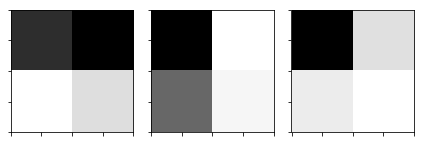

In [0]:
plotWeights(model_oneConv3filters,layout=(1,3),Layer=0,outputShape=(2,2,3),title=False)

**First filter is finding horizontal lines, second is vertical, and third is diagnal.**

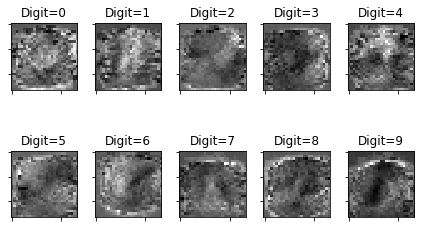

In [0]:
plotWeights(model_oneConv3filters,layout=(2,5),Layer=2,outputShape=(27,27,3,10),title=True,filternum=0)

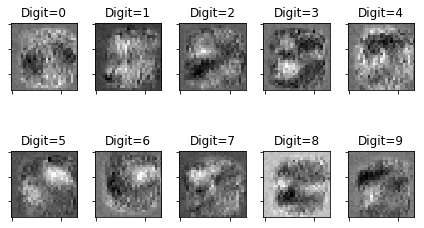

In [0]:
plotWeights(model_oneConv3filters,layout=(2,5),Layer=2,outputShape=(27,27,3,10),title=True,filternum=1)

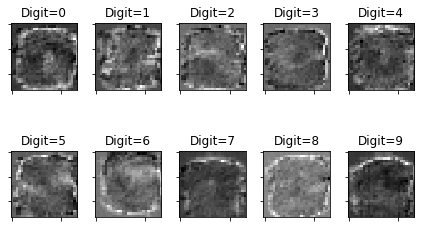

In [0]:
plotWeights(model_oneConv3filters,layout=(2,5),Layer=2,outputShape=(27,27,3,10),title=True,filternum=2)

**Dense layer filters are not much infomative or at least intituative in what they are doing.**

**Let's look at the outputs**

In [0]:
inp = model_oneConv3filters.input                           
outputs = model_oneConv3filters.layers[0].output          
functors = backend.function([inp], [outputs]) 

test = test_images[3:4]
layer_outs = functors([test])

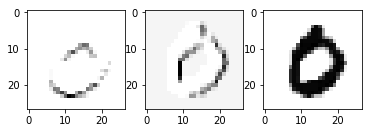

In [0]:
fig,axes=plt.subplots(nrows=1,ncols=3)

axes[0].imshow(np.asarray(layer_outs).reshape(27,27,3)[:,:,0],cmap=plt.cm.binary)
axes[1].imshow(np.asarray(layer_outs).reshape(27,27,3)[:,:,1],cmap=plt.cm.binary)
axes[2].imshow(np.asarray(layer_outs).reshape(27,27,3)[:,:,2],cmap=plt.cm.binary)

**These are outputs are in accordance as filters would suggest.**

**Let's increase the filters to high numbers**

In [0]:
model_oneConv10filters = models.Sequential()
model_oneConv10filters.add(layers.Conv2D(10, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model_oneConv10filters.add(layers.Flatten())
model_oneConv10filters.add(layers.Dense(10, activation='softmax'))
model_oneConv10filters.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model_oneConv10filters.fit(train_images, train_labels, epochs=20,validation_data=(test_images,test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2767 - acc: 0.9235 - val_loss: 0.1435 - val_acc: 0.9615
Epoch 2/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1155 - acc: 0.9684 - val_loss: 0.0942 - val_acc: 0.9731
Epoch 3/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0783 - acc: 0.9779 - val_loss: 0.0796 - val_acc: 0.9761
Epoch 4/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0611 - acc: 0.9828 - val_loss: 0.0773 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0496 - acc: 0.9857 - val_loss: 0.0740 - val_acc: 0.9763
Epoch 6/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0410 - acc: 0.9879 - val_loss: 0.0770 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0358 - acc: 0.9894 - val_loss: 0.

**Increasing the filters to 10 increases the test accuracy only by 0.5% but increases the train accuracy to almost 100%. Thus there is a clear overfitting. Let's see how max pooling can help in improving test accuracy.**

In [0]:
model_10filtersMaxPool = models.Sequential()
model_10filtersMaxPool.add(layers.Conv2D(10, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model_10filtersMaxPool.add(layers.MaxPooling2D((2, 2)))
model_10filtersMaxPool.add(layers.Flatten())
model_10filtersMaxPool.add(layers.Dense(10, activation='softmax'))
model_10filtersMaxPool.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model_10filtersMaxPool.fit(train_images, train_labels, epochs=20,validation_data=(test_images,test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3522 - acc: 0.9039 - val_loss: 0.1899 - val_acc: 0.9460
Epoch 2/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1634 - acc: 0.9541 - val_loss: 0.1287 - val_acc: 0.9633
Epoch 3/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1197 - acc: 0.9665 - val_loss: 0.1047 - val_acc: 0.9692
Epoch 4/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0963 - acc: 0.9725 - val_loss: 0.0903 - val_acc: 0.9739
Epoch 5/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0828 - acc: 0.9758 - val_loss: 0.0855 - val_acc: 0.9742
Epoch 6/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0732 - acc: 0.9787 - val_loss: 0.0801 - val_acc: 0.9751
Epoch 7/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0667 - acc: 0.9806 - val_loss: 0.

**This increases the val acc. by another 0.5%. The max pooling layer acts like a regularization factor.**

**Using two convolutional layers.**

In [0]:
model_twoConvOneMax = models.Sequential()
model_twoConvOneMax.add(layers.Conv2D(10, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model_twoConvOneMax.add(layers.MaxPooling2D((2, 2)))
model_twoConvOneMax.add(layers.Conv2D(10, (2, 2), activation='relu'))
model_twoConvOneMax.add(layers.MaxPooling2D((2, 2)))
model_twoConvOneMax.add(layers.Flatten())
model_twoConvOneMax.add(layers.Dense(10, activation='softmax'))
model_twoConvOneMax.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model_twoConvOneMax.fit(train_images, train_labels, epochs=20,validation_data=(test_images,test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3881 - acc: 0.8848 - val_loss: 0.1801 - val_acc: 0.9456
Epoch 2/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1460 - acc: 0.9557 - val_loss: 0.1076 - val_acc: 0.9660
Epoch 3/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1064 - acc: 0.9671 - val_loss: 0.0916 - val_acc: 0.9705
Epoch 4/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0876 - acc: 0.9732 - val_loss: 0.0782 - val_acc: 0.9748
Epoch 5/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0765 - acc: 0.9762 - val_loss: 0.0731 - val_acc: 0.9763
Epoch 6/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0681 - acc: 0.9793 - val_loss: 0.0665 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0625 - acc: 0.9806 - val_l

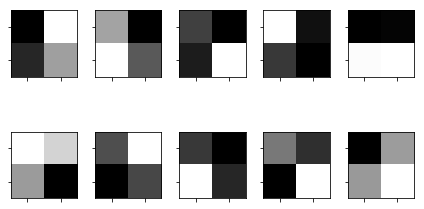

In [0]:
plotWeights(model_twoConvOneMax,layout=(2,5),Layer=0,outputShape=(2,2,10),title=False)

**Since we are interested in outputs from all the layers, let's define a function to get all the outputs.**

In [0]:
def layerOutputs(model):
    '''
    Returns outputs of all the layer of given model when applied on test set.
    '''

    inp = model.input
    outputs = [layer.output for layer in model.layers]
    functors = [backend.function([inp], [out]) for out in outputs]

    test = test_images
    layerOuts = [func([test]) for func in functors]
    return layerOuts

In [0]:
layer_outs=layerOutputs(model_twoConvOneMax)

In [0]:
def plotLayerOutput(layer_outs,examplenumber=0,reshapeSize=(27,27,10)):
    '''
    Plots output of given output from layers of model for specific example in test set.
    '''

    _,axes=plt.subplots(nrows=2,ncols=5)

    axes_unrolled=axes.reshape(1,10)[0]
    for i in range(10):
        axes_unrolled[i].imshow(np.asarray(layer_outs[examplenumber]).reshape(reshapeSize)[:,:,i],cmap=plt.cm.binary)
        axes_unrolled[i].set_yticklabels([])
        axes_unrolled[i].set_xticklabels([])



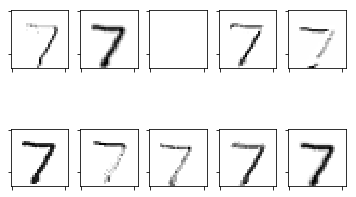

In [0]:
plotLayerOutput(layer_outs[0][0])

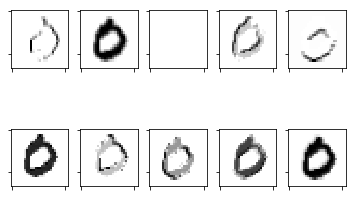

In [0]:
plotLayerOutput(layer_outs[0][0],examplenumber=3)

**This shows the bottleneck effect here, because we chose same number of filters in the two consecutive layers. Let's check if 3rd filter is deactivated for all the examples in the test set.**

**For this, we define a function that looks through all the examples to check if there is even a single example present with activated filter or not.**

In [0]:
def findIfActivated(layer_outs, filternumber=0):
    '''
    Finds if a filternumber is activated for all the examples 
    in the test set. 
    '''

    for examples in layer_outs:
        if np.asarray(examples)[:,:,filternumber].any():
          print('Example with activating filter present')
          return 0
    print('Example with activating filter not present'.upper())
    return 1


In [0]:
#for the 2nd filter
findIfActivated(layer_outs[0][0],1)

'Example with activating filter present'

In [0]:
#for the 3rd filter
findIfActivated(layer_outs[0][0],2)

'EXAMPLE WITH ACTIVATING FILTER NOT PRESENT'

**A function for resetting the weights before going through each iteration of optimizing them using gradient descent on the same model.**(for details see code cell below)

In [0]:
def reset_weights(model):
    '''
    Resets the weights of the given model.
    Taken from 
    https://gist.github.com/elijahc/eabbe365b3b2ba468d33be97e788fec8
    '''
    
    session = backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

**Let's check how the ratio of deactivated filters changes, as we play around with the number of filters in the second layer.**

In [0]:
deactFilterStore={}
valAccStore={}
for secLayTotFil in range(5,51,5):
    #define the model
    model_twoConvOneMaxTest = models.Sequential()
    model_twoConvOneMaxTest.add(layers.Conv2D(10, (2, 2), activation='relu', input_shape=(28, 28, 1)))
    model_twoConvOneMaxTest.add(layers.MaxPooling2D((2, 2)))
    model_twoConvOneMaxTest.add(layers.Conv2D(secLayTotFil, (2, 2), activation='relu'))
    model_twoConvOneMaxTest.add(layers.MaxPooling2D((2, 2)))
    model_twoConvOneMaxTest.add(layers.Flatten())
    model_twoConvOneMaxTest.add(layers.Dense(10, activation='softmax'))
    model_twoConvOneMaxTest.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    deactFilterStore[secLayTotFil]=[]
    valAccStore[secLayTotFil]=[]
    for iteration in range(10):
        reset_weights(model_twoConvOneMaxTest)
        history=model_twoConvOneMaxTest.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels),verbose=0)  

        #Store the layer outputs
        layer_outs=layerOutputs(model_twoConvOneMaxTest)
        print("model with total filter in the second layer-:{}".format(secLayTotFil))
        deactivatedfilters=0
        for filternumber in range(10):
            print('filter number in Convolutional layer:{}'.format(filternumber))
            deactivatedfilters += findIfActivated(layer_outs[0][0],filternumber)
    
    deactivatedfilters = deactivatedfilters/10
    
    deactFilterStore[secLayTotFil].append(deactivatedfilters)
    valAccStore[secLayTotFil].append(history.history['val_acc'])

    print(iteration,deactivatedfilters)
    print(history.history['val_acc'])
    print("\n\n\n")


model with total filter in the second layer-:5
filter number in Convolutional layer:0
Example with activating filter present
filter number in Convolutional layer:1
Example with activating filter present
filter number in Convolutional layer:2
Example with activating filter present
filter number in Convolutional layer:3
Example with activating filter present
filter number in Convolutional layer:4
Example with activating filter present
filter number in Convolutional layer:5
Example with activating filter present
filter number in Convolutional layer:6
Example with activating filter present
filter number in Convolutional layer:7
Example with activating filter present
filter number in Convolutional layer:8
Example with activating filter present
filter number in Convolutional layer:9
Example with activating filter present
0 0.0
[0.9445, 0.9593, 0.9631, 0.964, 0.9638, 0.9685, 0.9709, 0.9727, 0.9734, 0.9749]




model with total filter in the second layer-:5
filter number in Convolutional layer

**As one can see, there are some values for which validation accuracies are below 0.5. This result is an anomaly as the initial condition are randomly chosen to be really far away from global minimum of the cost function. Thus, we need ignore these model values as they were stuck in local minima.**

In [0]:
def removeAnomalies(valAccStore,deactFilterStore):
    '''
    Remove anomalies(model fits with <0.5 accuracy on test set.) 
    to have more accurate plots.
    '''

    for items in valAccStore:
        for index,array in enumerate(valAccStore[items]):
            if array[0]<0.5:
                del valAccStore[items][index]
                del deactFilterStore[items][index]

In [ ]:
removeAnomalies(valAccStore,deactFilterStore)

**Find out the average values of total number of deactivated filters, in different models, averaged over all the iterations.**

In [0]:
deactValMean=np.zeros((len(deactFilterStore.keys())))
valAccMean=np.zeros((len(deactFilterStore.keys())))
for index,key in enumerate(deactFilterStore.keys()):
    deactValMean[index]=np.asarray(deactFilterStore[key]).mean()
    valAccMean[index]=np.asarray(valAccStore[key]).mean()

**Let's plot this values.**

Text(0.5, 0.98, 'Number of filters in first layer=10')

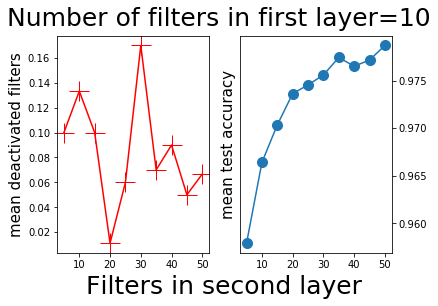

In [0]:
fig,axes=plt.subplots(nrows=1,ncols=2)
xlist=np.arange(5,51,5)
axes[0].plot(deactFilterStore.keys(),deactValMean,'r+-',markersize=20)
axes[1].plot(valAccStore.keys(),valAccMean,'.-',markersize=20)
axes[0].set_xlabel('Filters in second layer',fontsize='25')
axes[0].set_ylabel('mean deactivated filters',fontsize='15')
axes[1].set_ylabel('mean test accuracy',fontsize='15')

axes[1].yaxis.tick_right()
axes[0].xaxis.set_label_coords(1.1, -0.1)
fig.suptitle('Number of filters in first layer=10',fontsize='25')

**This does indicate a minimum of deactivated at the almost twice filter number(=20) in comparison with first layer(=10). The validation accuracy seems to increase as the total number of second layer filters are increased till second layer filters=40 and then the validation accuracy saturates.**  

**Let's check if this is true for different number of first layer filters varying among 4 values and see how ratio of deactivated filters change as the ratio between first layer and second layer filter is changed.**

In [ ]:
deactFilterStoreAd={}
valAccStoreAd={}

for firstLayTotFil in range(10,30,5):
    for secLayTotFil in range(5,2*firstLayTotFil+11,5):
        
        #define the model
        model_twoConvOneMaxTest = models.Sequential()
        model_twoConvOneMaxTest.add(layers.Conv2D(firstLayTotFil, (2, 2), activation='relu', input_shape=(28, 28, 1)))
        model_twoConvOneMaxTest.add(layers.MaxPooling2D((2, 2)))
        model_twoConvOneMaxTest.add(layers.Conv2D(secLayTotFil, (2, 2), activation='relu'))
        model_twoConvOneMaxTest.add(layers.MaxPooling2D((2, 2)))
        model_twoConvOneMaxTest.add(layers.Flatten())
        model_twoConvOneMaxTest.add(layers.Dense(10, activation='softmax'))
        model_twoConvOneMaxTest.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        #Initialize the dictionary keys to empty array to be appended later. 
        deactFilterStoreAd[(firstLayTotFil,secLayTotFil)]=[]
        valAccStoreAd[(firstLayTotFil,secLayTotFil)]=[]
        
    #10 iteration with same net architect.
    for iteration in range(10):
        #Reset the weights before an iterations.
        reset_weights(model_twoConvOneMaxTest)
        history=model_twoConvOneMaxTest.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels),verbose=0)
        
        #Store the layer outputs.
        layer_outs=layerOutputs(model_twoConvOneMaxTest)
        print("model with total filter in the second layer-:{}".format(secLayTotFil))
        deactivatedfilters=0
        for filternumber in range(firstLayTotFil):
            print('filter number in Convolutional layer:{}'.format(filternumber))
            deactivatedfilters += findIfActivated(layer_outs[0][0],filternumber)

        deactivatedfilters = deactivatedfilters/firstLayTotFil
      
        #Append the iterations.
        deactFilterStoreAd[(firstLayTotFil,secLayTotFil)].append(deactivatedfilters)
        valAccStoreAd[(firstLayTotFil,secLayTotFil)].append(history.history['val_acc'])


    print(iteration,deactivatedfilters)
    print(history.history['val_acc'])
    print("\n\n\n")

**First remove all the anomalies.**

In [0]:
removeAnomalies(valAccStoreAd,deactFilterStoreAd)

**Finding the mean values as before**

In [0]:
deactValAdMean={}
valAccAdMean={}
for index,key in enumerate(deactFilterStoreAd.keys()):
    deactValAdMean[key]=np.asarray(deactFilterStoreAd[key]).mean()
    valAccAdMean[key]=np.asarray(valAccStoreAd[key]).mean()

**Let's plot the results.**

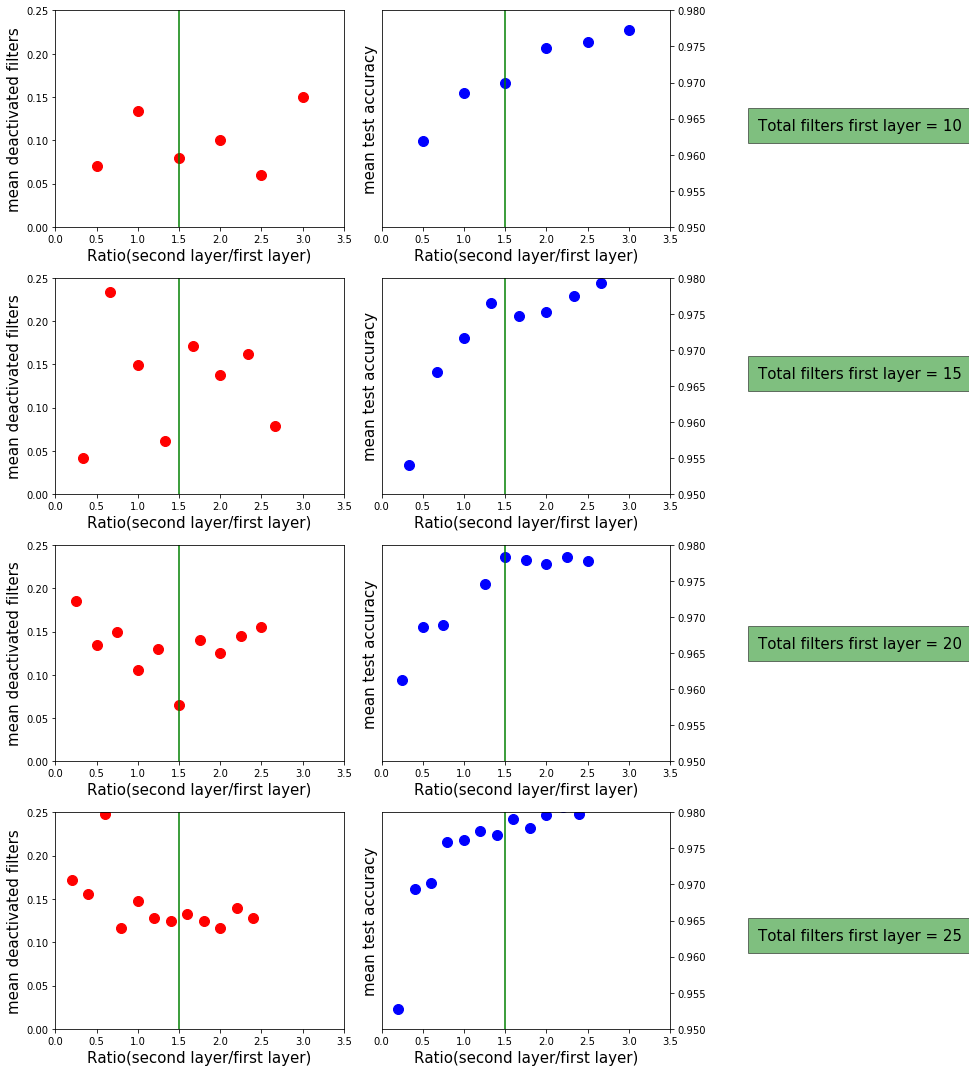

In [67]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(10,15))

for index1,firstLayTotFil in enumerate(range(10,26,5)):
    for secLayTotFil in range(5,2*firstLayTotFil+11,5):
        #Here we plots the ratios between second and first layers instead of absolute values
        #to see if there is universal values 
        axes[index1][0].plot(secLayTotFil/firstLayTotFil,deactValAdMean[(firstLayTotFil,secLayTotFil)],'r.',markersize=20)
        axes[index1][1].plot(secLayTotFil/firstLayTotFil,valAccAdMean[(firstLayTotFil,secLayTotFil)],'b.',markersize=20)
        
        #x and y labels
        axes[index1][0].set_xlabel('Ratio(second layer/first layer)',fontsize='15')
        axes[index1][1].set_xlabel('Ratio(second layer/first layer)',fontsize='15')
        axes[index1][0].set_ylabel('mean deactivated filters',fontsize='15')
        axes[index1][1].set_ylabel('mean test accuracy',fontsize='15')
  
    #Based on observation ratio of around 1.5 between second and 
    #first layer seem to minimize the amount of deactivated filters for this dataset
    #Below we plot a line along the y axis to at x=1.5 to show this
    yForLine=np.arange(0,0.29,0.01)
    xForLine=1.5*np.ones((len(yForLine)))
    axes[index1][0].plot(xForLine,yForLine,'g-')
  
    #for val acc plots.
    yForLine=np.arange(0.95,0.98,0.01)
    xForLine=1.5*np.ones((len(yForLine)))
    axes[index1][1].plot(xForLine,yForLine,'g-')
  
   #Setting limits so the data is comparable in different plots. 
    axes[index1][0].set_ylim([0, 0.25])  
    axes[index1][1].set_ylim([0.95, 0.98])  
    axes[index1][0].set_xlim([0, 3.5])
    axes[index1][1].set_xlim([0, 3.5])
    axes[index1][1].yaxis.tick_right()

#To characterize the rows of plot
fig.text(1.2, 0.88, 'Total filters first layer = {}'.format(10), bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, ha='center', va='center', fontsize=15)
fig.text(1.2, 0.65, 'Total filters first layer = {}'.format(15), bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, ha='center', va='center', fontsize=15)
fig.text(1.2, 0.40, 'Total filters first layer = {}'.format(20), bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, ha='center', va='center', fontsize=15)
fig.text(1.2, 0.13, 'Total filters first layer = {}'.format(25), bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, ha='center', va='center', fontsize=15)

plt.tight_layout()


**In conclusion, there are three things that these plots indicate:**

**(i) Data seems to somewhat noisy as computation resources that i can use at this moment only allows to go only 10 iterations for all of these models.**

**(ii) Even with noisy data, some trends seem to emerge.**

**--- There are generally more deactivated filters if second layer has less filters than first layer (ratio < 1).**

**--- Region around the values of ratio=1.5 seems to generally seems low amount of deactivated filters.**

**--- Average value of deactivated filters increase as the number of filters in the first layer increase.**

**(iii) Test accuracy increases on the average as the total number of parameters in the system increase. It increases till ratio=1.5, then it saturates.** 

**Thus, these plot indicate towards the "bottleneck effect" below ratio of 1 and best choice seems to be around ratio=1.5 or 2 which has been choice for many famous network architect like VGG16, VGG19 or MobileNets etc.**